# Decision Trees in Scikit-Learn Demo

In [56]:
from pathlib import Path

In [57]:
# zainstaluj dodatkowe pakiety

!conda install pydotplus -y
!conda install graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [62]:
%load_ext watermark
%watermark  -d -u -a 'Łukasz Augustyniak' -v -p numpy,scipy,matplotlib,sklearn,pydotplus

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Łukasz Augustyniak

Last updated: 2021-05-13

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.21.0

numpy     : 1.19.2
scipy     : 1.6.1
matplotlib: 3.3.4
sklearn   : 0.24.1
pydotplus : 2.0.2



In [63]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [64]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [65]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [66]:
Path("./images").mkdir(exist_ok=True)

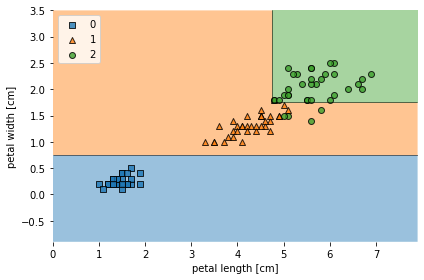

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(
    criterion='gini', # jakie inne miary możemy tutaj dodać?
    max_depth=3, # poeksperymnetuj z głebokoscią drzewa
    random_state=1,
    min_samples_leaf=1
)

tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/sklearn_tree.png', dpi=300)
plt.savefig('images/sklearn_tree.pdf')
plt.show()

In [122]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('images/tree.png')

True

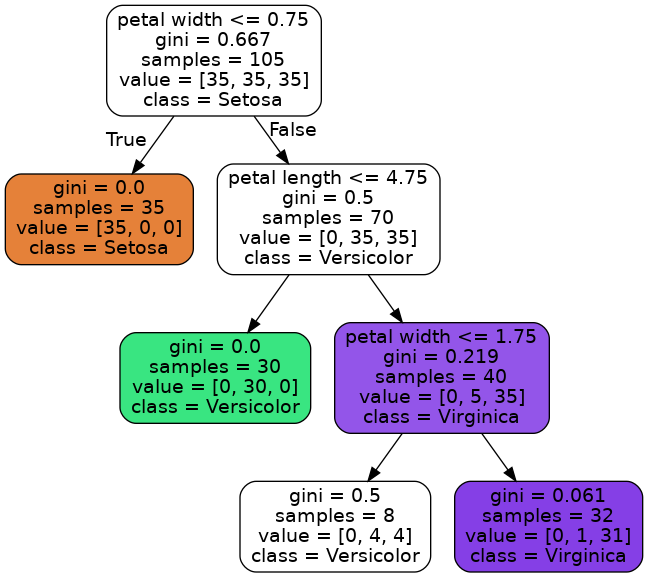

In [123]:
from IPython.display import Image


Image('images/tree.png')